# 신과함께- 죄와벌 
---
# 리뷰를 이용한 워드 클라우드 & 분류기 학습

## 신과함께를 선정한 이유
---

### 기술적인 이유  
1. **2018년 이후에 개봉한 영화이거나 2018년 이후 리뷰가 많은 영화**
    - 다음 영화 평점을 보면 2017년 이전의 네티즌 평점에는 리뷰가 없는 경우가 많았다. 그래서 2017년 12월 20일날 개봉한 신과함께를 선택하였다.    
     &ensp;
2. **천만 영화**
    - 영화 관람객이 많았던 영화일수록 리뷰가 많다. 신과함께의 리뷰는 6600명 이상의 사람들이 작성하였다.    
     &ensp;
3. **호불호가 갈리는 영화, 평점 7점대 영화**
    - 긍정적인 평이 많은 영화이면 부정 워드 클라우드를 그릴 때 어려움이 있다. 신과함께는 호불호가 뚜렷한 영화이다. 

# 영화 리뷰 가져오기

In [1]:
from selenium import webdriver
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
driver = webdriver.Chrome(r"C:\Users\mi\Downloads\chromedriver_win32\chromedriver.exe")

C:\Users\mi\AppData\Local\Temp\ipykernel_8428\198482379.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\mi\Downloads\chromedriver_win32\chromedriver.exe")


In [3]:
driver.get("https://movie.daum.net/moviedb/grade?movieId=73003")

# 영화 리뷰 받기

In [4]:
# 평점 더보기 클릭 : 80번
for _ in range(81): 
    driver.find_element(By.CLASS_NAME, 'img_cmt.img_more').click()
    time.sleep(0.5)

In [5]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

all_result = soup.find("ul", {"class": "list_comment"})
li_result = all_result.find_all("li")
text = []
ratings = []

for li in all_result:
    
    desc = li.find("p")
    
    if desc == None:
        continue
    
    else:
        desc = li.find("p").text
        rating = int(li.find("div", {'class': 'ratings'}).text)
    
    text.append(desc)
    ratings.append(rating)

print(text)
print(ratings)

["멋진 원작을 상투적인 억지신파극으로 만들어버린 망작!\n7~80년대 '엄마 없는 하늘 아래' 랑 다름 없는 수준...\n원작의 스토리가 아깝고, 배우들이 아깝고, 스텝들이 아깝고..cg가 아까움\n", '일단 스토리가 너무 유치찬란해서 거의 아동교육용 수준 영화라고 생각하고 보시면 된다. 한마디로 수준미달', '스포리 완성도에 앞서서 일단 영화가 너무 늘어짐. 아.. 비슷비슷한거를 7번씩이나 반복하는것도 그렇고, 나중에도 하는 얘기가 거의 비슷비슷해짐. 정말 말도안되는 소리 지껄이는거 보면 기가막힘.', 'CG광고', '나름 죽음과 인생을 생각하게 한 영화,조금 정신없지만', '사후세계에 대한 동양적 해석만 반가운 정도랄까', '저승에서 판결하는것 생각하면 대한민국 쓰래기 판사들이 생각나서 화가남. 생각없이 보면 재밌음.', '울어 울어 울란 말이야. 슬프지? 슬프지 않어? 이래도 안울어? 사이에 간간히 액션과 드라마와 판타지가 있는 영화.', '원작 안보고 봤으면 7점 줬을거다...', '진짜 역대급으로 재미없는 영화엿음 마지막에 감성팔이 하는 것도 어? 설마 이쯤에서 엄마가 뭐라고 할려나? 햇더니 그냥 바로 엄마가 감성팔이 시전 ㅋㅋ', '오랜만에 눈물 펑펑', '노잼', '..', '잼나는구만', '최고는 아니지만... 최초라는 데 의미를 두면... 볼 만 한 영 화!!', '다시봐도 걸작 !! ', '동양의 정신세계를 영화화한 판타지라는 점에서 가치가 있다. 이와 동시에 인과율로 인해 선과 악으로 사람의 삶이 단적으로 평가된다는 점에서는 다소 단조로운 구성을 가지고 있다. 영화로서의 가치를 평가하자면 평범하고 한국영화가 어떤 정신세계를 담아내려하고 있다라는 가능성 측면에서 보자면 좋은 평가를 주고 싶다. 가감하여 7점이 적당하지 않나 싶다. ', '판타지에 한표... 한편을 두편으로 쪼개 만들어 쌍 천만을 만든 홍보팀에 한표...', '돌이켜보자', '아 진짜 원작 훼손', '중국 드라마 보는줄.. \n차사들 옷은 왜 그렇게 입혔는지..\n스토리는 

## 리뷰와 평점을 하나로 합치기

In [6]:
review_ratings = []
for i in range(len(text)):
    review_ratings.append(text[i] + ' : ' + str(ratings[i])+ '\n')

print(review_ratings)

["멋진 원작을 상투적인 억지신파극으로 만들어버린 망작!\n7~80년대 '엄마 없는 하늘 아래' 랑 다름 없는 수준...\n원작의 스토리가 아깝고, 배우들이 아깝고, 스텝들이 아깝고..cg가 아까움\n : 1\n", '일단 스토리가 너무 유치찬란해서 거의 아동교육용 수준 영화라고 생각하고 보시면 된다. 한마디로 수준미달 : 1\n', '스포리 완성도에 앞서서 일단 영화가 너무 늘어짐. 아.. 비슷비슷한거를 7번씩이나 반복하는것도 그렇고, 나중에도 하는 얘기가 거의 비슷비슷해짐. 정말 말도안되는 소리 지껄이는거 보면 기가막힘. : 1\n', 'CG광고 : 2\n', '나름 죽음과 인생을 생각하게 한 영화,조금 정신없지만 : 8\n', '사후세계에 대한 동양적 해석만 반가운 정도랄까 : 5\n', '저승에서 판결하는것 생각하면 대한민국 쓰래기 판사들이 생각나서 화가남. 생각없이 보면 재밌음. : 8\n', '울어 울어 울란 말이야. 슬프지? 슬프지 않어? 이래도 안울어? 사이에 간간히 액션과 드라마와 판타지가 있는 영화. : 4\n', '원작 안보고 봤으면 7점 줬을거다... : 5\n', '진짜 역대급으로 재미없는 영화엿음 마지막에 감성팔이 하는 것도 어? 설마 이쯤에서 엄마가 뭐라고 할려나? 햇더니 그냥 바로 엄마가 감성팔이 시전 ㅋㅋ : 1\n', '오랜만에 눈물 펑펑 : 7\n', '노잼 : 3\n', '.. : 8\n', '잼나는구만 : 7\n', '최고는 아니지만... 최초라는 데 의미를 두면... 볼 만 한 영 화!! : 9\n', '다시봐도 걸작 !!  : 10\n', '동양의 정신세계를 영화화한 판타지라는 점에서 가치가 있다. 이와 동시에 인과율로 인해 선과 악으로 사람의 삶이 단적으로 평가된다는 점에서는 다소 단조로운 구성을 가지고 있다. 영화로서의 가치를 평가하자면 평범하고 한국영화가 어떤 정신세계를 담아내려하고 있다라는 가능성 측면에서 보자면 좋은 평가를 주고 싶다. 가감하여 7점이 적당하지 않나 싶다.  : 7\n', '판타지에 한표... 

## 텍스트 분류하기
- 평점, 리뷰 리스트 사용해 텍스트 분류

In [7]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
pos_class_num = 0
neg_class_num = 0
def load_data():
    global pos_class_num, neg_class_num
    train = []
    
    for txt,rating in zip(text, ratings):
            
        if rating > 8 : 
            rating = 'pos'
            train.append((txt, rating))
            pos_class_num += 1

        elif rating < 5 : 
            rating = 'neg'
            train.append((txt, rating))
            neg_class_num += 1

        else : 
            continue
       
    
    return train

In [9]:
train = load_data()
print(train[:5])

[("멋진 원작을 상투적인 억지신파극으로 만들어버린 망작!\n7~80년대 '엄마 없는 하늘 아래' 랑 다름 없는 수준...\n원작의 스토리가 아깝고, 배우들이 아깝고, 스텝들이 아깝고..cg가 아까움\n", 'neg'), ('일단 스토리가 너무 유치찬란해서 거의 아동교육용 수준 영화라고 생각하고 보시면 된다. 한마디로 수준미달', 'neg'), ('스포리 완성도에 앞서서 일단 영화가 너무 늘어짐. 아.. 비슷비슷한거를 7번씩이나 반복하는것도 그렇고, 나중에도 하는 얘기가 거의 비슷비슷해짐. 정말 말도안되는 소리 지껄이는거 보면 기가막힘.', 'neg'), ('CG광고', 'neg'), ('울어 울어 울란 말이야. 슬프지? 슬프지 않어? 이래도 안울어? 사이에 간간히 액션과 드라마와 판타지가 있는 영화.', 'neg')]


# 분류기 학습하기

- 모든 단어 집합 만들기
- 각 문장을 단어가 있는지 없는지 여부로 표현
- 단어별 확률 계산

In [10]:
from konlpy.tag import Okt
okt = Okt()

In [11]:
def pos_tokenize(raw_sent):
    pos_sent = []
    sent = okt.pos(raw_sent, norm=True, stem=True)
    
    for tup in sent:
        word, tag = tup[0], tup[1]
        word_tag = word + '/' + tag
        pos_sent.append(word_tag)
    return ' '.join(pos_sent)

In [12]:
def make_word_dict(train, use_morph=False):
    all_words = set()
    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph: sent = pos_tokenize(sent)
        words = word_tokenize(sent)
        for word in words:
            all_words.add(word)
    return all_words

In [13]:
def make_train_feats(train, all_words, use_morph=False):
    train_features = []

    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph: sent = pos_tokenize(sent)
        words = word_tokenize(sent)   
        tmp = {set_word: (set_word in words) for set_word in all_words}

        sent_tup = (tmp, label)
        train_features.append(sent_tup)

    for i in range(len(train_features)):
        print(train_features[i])
    return train_features

In [14]:
use_morph = True
all_words = make_word_dict(train, use_morph)
print('단어 집합 개수: ', len(all_words))
train_features = make_train_feats(train, all_words, use_morph)

단어 집합 개수:  3667


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
classifier = nltk.NaiveBayesClassifier.train(train_features)
classifier.show_most_informative_features(n=15)

Most Informative Features
                 최악/Noun = True              neg : pos    =     22.5 : 1.0
                  비/Noun = True              neg : pos    =     13.1 : 1.0
         억지스럽다/Adjective = True              neg : pos    =     13.1 : 1.0
                 졸다/Verb = True              neg : pos    =     12.3 : 1.0
                신파극/Noun = True              neg : pos    =     11.4 : 1.0
                쓰레기/Noun = True              neg : pos    =     11.4 : 1.0
                 전혀/Noun = True              neg : pos    =     11.4 : 1.0
                  애/Noun = True              neg : pos    =     10.6 : 1.0
           괜찮다/Adjective = True              pos : neg    =     10.2 : 1.0
                 강철/Noun = True              neg : pos    =      9.8 : 1.0
                 천만/Noun = True              neg : pos    =      8.7 : 1.0
                성/Suffix = True              neg : pos    =      8.4 : 1.0
           아깝다/Adjective = True              neg : pos    =      8.3 : 1.0

## 분류기 결과 확인해보기

In [16]:
test = load_data()

In [17]:
test_features = make_train_feats(test, all_words, use_morph)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
classifier.classify(test_features[0][0])

'neg'

# 전체, 긍정/부정 워드 클라우드 그리기

In [19]:
pos_wordcloud = [] # 긍정
neg_wordcloud = [] # 부정
wordcloud = [] # 전체

def find_pos_neg():
    #train = []
    global pos_wordcloud, neg_wordcloud
    
    for txt,rating in zip(text, ratings):
            
        if rating > 8 : # 9점 이상일 경우, 긍정으로 저장
            rating = 'pos'
            #train.append((txt, rating))
            pos_wordcloud.append(txt)
        elif rating < 5 : # 4점 이하일 경우, 부정으로 저장
            rating = 'neg'
            #train.append((txt, rating))
            neg_wordcloud.append(txt)
        else : 
            continue

In [20]:
find_pos_neg()
wordcloud = pos_wordcloud + neg_wordcloud # 전체 저장

## 데이터 전처리
okt 이용하기

In [21]:
pos_ko_doc = ''.join(pos_wordcloud)
neg_ko_doc = ''.join(neg_wordcloud)
ko_doc = ''.join(wordcloud)
print(pos_ko_doc[:900])
print(neg_ko_doc[:900])
print(ko_doc[:900])

최고는 아니지만... 최초라는 데 의미를 두면... 볼 만 한 영 화!!다시봐도 걸작 !! 판타지에 한표... 한편을 두편으로 쪼개 만들어 쌍 천만을 만든 홍보팀에 한표...돌이켜보자이제야 봤는데,
동양의 윤회사상이 바탕이라 기생충처럼 오스카상은 못받겠지만,
우리 나라 최고의 영화 중의 하나임에는 틀림 없다진심으로 천국과 지옥을 오고가며 벌어지는 전생에 관한 이야기!!   너무 보고 싶어요!!!신과 함께 1은 주지훈 땜에 봤다가 김동욱 땜에 울었음ㅠㅠ
2편은 주지훈 하얀삵 연기가 멋졌음^^재미있어요.사후세계는 어떤걸까
슬프다먼가 아쉽지만..  재밋었음2편을 먼저 보고 봐도 재밌습니다~~♥ 적극 추천해요~~마지막 어무니의 사랑 장면에서 폭풍 감동 눈물 펑펑ㅠㅠㅎ 근데 불교 힌두교 등에서는 환생을 끊는 것이 목적이라고 하던데 마지막 환생해서 좋아하는 장면 보고 좀 이상하긴 합니다..영화로만 즐기기에는  최고였슴ㄱㅊ1,2편을 합쳐서 동시에 평가하자면 내가 내가본 국내산 한국 천만영화중 최고다!!!!!!!어거지 감동? 
이영화를 보고 조금의 눈물이 나왔다면 
어거지라는 말을 하지 못하는게 당연하다신선한 내용이다평점을 깔 필요는 없어보이는데 재미있습니다.진짜 너무 만족합니다 ㅠㅠㅠㅠㅠㅠ   영상보고 펑펑 울어버렸네요.. 진짜..너무 쟈밌게 봤어요!!  신과함께 너무 보고싶었는데 봤을 때 너무 신나했었습니다 엉엉엉... 신과함께 파이팅!!하세요!인생영화 최근 본 영화 중 가장 재밌었다잘 만든 영화예요.
반성도 하게되고 눈물도 펑펑. 재밌기만하구만
김동욱이살아있었다는거에얼마나무섭고공포속에죽었을까짐작도할수없고불쌍했다ㅠ사람이제일무섭다ㅠ
엄마꿈에나와서오열하면서얘기할때눈물나죽는줄알았는데
왜재미없데~~~
극장에서볼걸추석영화루 다시 봄ㅋ 난 넘 감동이구 재밌는데 수준참 그렇다구 꼭 그런 얘길 하다니ㅠ 이런건
멋진 원작을 상투적인 억지신파극으로 만들어버린 망작!
7~80년대 '엄마 없는 하늘 아래' 랑 다름 없는 수준...
원작의 스토리가 아깝고, 배우들이 아깝고, 스텝들이 아깝고..

In [22]:
print(len(pos_ko_doc))
print(len(neg_ko_doc))
print(len(ko_doc))

33187
29743
62930


## 명사 추출하기

In [23]:
pos_ko_doc_noun = okt.nouns(pos_ko_doc)
neg_ko_doc_noun = okt.nouns(neg_ko_doc)
ko_doc_noun = okt.nouns(ko_doc)

In [24]:
from collections import Counter

pos_count_noun = Counter(pos_ko_doc_noun)
neg_count_noun = Counter(neg_ko_doc_noun)
count_noun = Counter(ko_doc_noun)

In [25]:
pos_count_noun.most_common(20)

[('영화', 358),
 ('감동', 137),
 ('정말', 71),
 ('생각', 69),
 ('눈물', 52),
 ('연기', 50),
 ('진짜', 48),
 ('재미', 47),
 ('보고', 46),
 ('사람', 43),
 ('배우', 41),
 ('최고', 40),
 ('마지막', 34),
 ('것', 34),
 ('한국', 33),
 ('이', 33),
 ('더', 30),
 ('신', 29),
 ('내', 29),
 ('정도', 29)]

In [26]:
neg_count_noun.most_common(20)

[('영화', 274),
 ('천만', 76),
 ('이', 59),
 ('스토리', 54),
 ('연기', 50),
 ('것', 42),
 ('돈', 42),
 ('정말', 41),
 ('원작', 38),
 ('수준', 38),
 ('왜', 38),
 ('관객', 37),
 ('그냥', 35),
 ('이해', 35),
 ('눈물', 34),
 ('감동', 34),
 ('차태현', 32),
 ('신파', 32),
 ('사람', 32),
 ('재미', 30)]

In [27]:
count_noun.most_common(20)

[('영화', 632),
 ('감동', 171),
 ('정말', 112),
 ('연기', 100),
 ('생각', 97),
 ('이', 92),
 ('천만', 89),
 ('눈물', 86),
 ('스토리', 80),
 ('재미', 77),
 ('것', 76),
 ('사람', 75),
 ('진짜', 73),
 ('보고', 67),
 ('배우', 65),
 ('원작', 65),
 ('마지막', 56),
 ('정도', 55),
 ('내용', 54),
 ('차태현', 54)]

## 불용어 처리
- 한 글자 단어는 불용어로 처리

In [28]:
#긍정 불용어 처리
pos_stopword_list = ["영화", "그냥"]

for word in pos_count_noun:
    if len(word) == 1: # 한 글자 단어는 불용어로
        pos_stopword_list.append(word)

pos_stopword_list[:5]

['영화', '그냥', '데', '볼', '만']

In [29]:
#부정 불용어 처리
neg_stopword_list = ["영화", "그냥"]

for word in neg_count_noun:
    if len(word) == 1: # 한 글자 단어는 불용어로
        neg_stopword_list.append(word)

neg_stopword_list[:5]

['영화', '그냥', '움', '용', '리']

In [30]:
#전체 불용어 처리
stopword_list = ["영화", "그냥"]

for word in count_noun:
    if len(word) == 1: # 한 글자 단어는 불용어로
        stopword_list.append(word)

stopword_list[:5]

['영화', '그냥', '데', '볼', '만']

## 불용어를 명사에서 삭제

### 긍정 불용어

In [31]:
for stopword in pos_stopword_list:
    if stopword in pos_count_noun:
        pos_count_noun.pop(stopword)

In [32]:
pos_count_noun.most_common(20)

[('감동', 137),
 ('정말', 71),
 ('생각', 69),
 ('눈물', 52),
 ('연기', 50),
 ('진짜', 48),
 ('재미', 47),
 ('보고', 46),
 ('사람', 43),
 ('배우', 41),
 ('최고', 40),
 ('마지막', 34),
 ('한국', 33),
 ('정도', 29),
 ('내용', 27),
 ('기대', 27),
 ('원작', 27),
 ('웹툰', 26),
 ('스토리', 26),
 ('김동욱', 25)]

### 부정 불용어

In [33]:
for stopword in neg_stopword_list:
    if stopword in neg_count_noun:
        neg_count_noun.pop(stopword)

In [34]:
neg_count_noun.most_common(20)

[('천만', 76),
 ('스토리', 54),
 ('연기', 50),
 ('정말', 41),
 ('원작', 38),
 ('수준', 38),
 ('관객', 37),
 ('이해', 35),
 ('눈물', 34),
 ('감동', 34),
 ('차태현', 32),
 ('신파', 32),
 ('사람', 32),
 ('재미', 30),
 ('생각', 28),
 ('억지', 27),
 ('시간', 27),
 ('최악', 27),
 ('내용', 27),
 ('정도', 26)]

### 전체 불용어

In [35]:
for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

In [36]:
count_noun.most_common(20)

[('감동', 171),
 ('정말', 112),
 ('연기', 100),
 ('생각', 97),
 ('천만', 89),
 ('눈물', 86),
 ('스토리', 80),
 ('재미', 77),
 ('사람', 75),
 ('진짜', 73),
 ('보고', 67),
 ('배우', 65),
 ('원작', 65),
 ('마지막', 56),
 ('정도', 55),
 ('내용', 54),
 ('차태현', 54),
 ('한국', 52),
 ('수준', 52),
 ('시간', 49)]

## 긍정 워드 클라우드

### 결과 해석
- 주로 재미, 감동을 느꼈다는 말과 배우들의 연기가 인상적이었다는 말이 많다. 영화의 스토리에 감명을 받았다는 내용이 주를 이룬다.

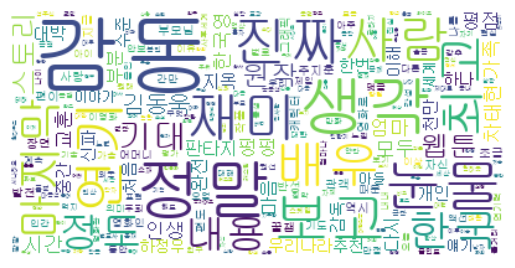

In [37]:
from wordcloud import WordCloud

pos_wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\gulim.ttc')

pos_wc_noun= pos_wc_noun.generate_from_frequencies(pos_count_noun)

import matplotlib.pyplot as plt
plt.imshow(pos_wc_noun, interpolation = "bilinear")
plt.axis("off")
plt.show()

## 부정 워드 클라우드

### 결과 해석
- 긍정 워드 클라우드의 단어인 스토리가 부정 워드 클라우드에도 적혀있다. 긍정적으로 해석한 사람은 스토리에 감명을 받았고 부정적으로 해석한 사람은 스토리가 진부하고 억지였다는 반응이다. 긍정 단어와 동일한 단어지만, 그 단어를 쓰는 문장의 문맥은 다르다.     
&nbsp;
                
- 스토리가 별로였다는 반응이 부정 클라우드 주요 내용이다.    
&nbsp;
- 긍정 워드 클라우드와 같은 단어도 다수 보이지만, 문맥상 사용의 긍부정은 달랐다.  

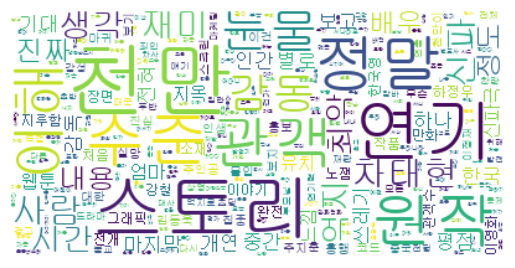

In [38]:
from wordcloud import WordCloud

neg_wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\gulim.ttc')

neg_wc_noun= neg_wc_noun.generate_from_frequencies(neg_count_noun)

import matplotlib.pyplot as plt
plt.imshow(neg_wc_noun, interpolation = "bilinear")
plt.axis("off")
plt.show()

## 전체 워드 클라우드

### 결과 해석

- 긍정적인 리뷰가 부정적인 리뷰보다 더 많다보니 긍정 단어가 더 크게 나온다. 전반적으로 스토리에 감동을 받은 사람들이 많다.

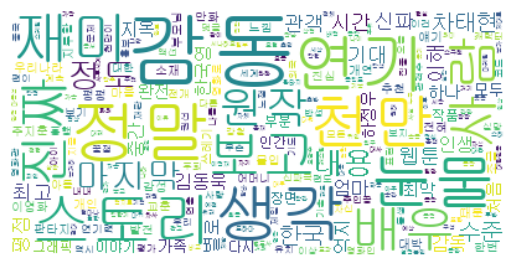

In [39]:
from wordcloud import WordCloud

wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\gulim.ttc')

wc_noun= wc_noun.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation = "bilinear")
plt.axis("off")
plt.show()

# 신과함께 - 죄와벌
---

## - 긍/부정, 전체 단어 빈도수 그래프


## 긍정 단어 빈도수
### 결과 해석
- 감동이라는 단어가 약 140회 부근으로 압도적으로 많이 나왔다. 나머지 단어들은 40회 이상 80회 이하 수준에 그쳤다. 

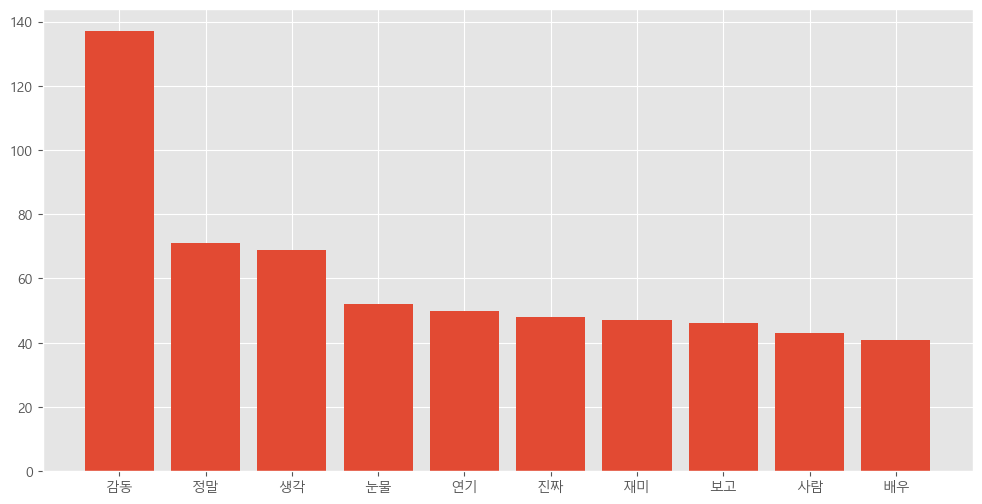

In [40]:
import collections
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 출력 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

# most_common 10개만 출력
p = pos_count_noun.most_common(10)
plt.figure(figsize=(12,6))
#w = collections.Counter(p)

# p(most_common) 값이 2차원 튜플이므로 각 값 key, value에다 저장
key = []
value = []
for i in p:
    key.append(i[0])
    value.append(i[1])

plt.bar(key,value)
plt.show()


## 부정 단어 빈도수
### 결과 해석
- 부정단어에서 천만이라는 글자가 가장 많이 나왔다. 부정 단어가 들어있는 문장을 보면 주로 이게 왜 천만 영화인지 모르겠다는 내용이었다. 천만이라는 단어를 제외하고 다른 단어들은 비슷한 빈도로 출력되었다.

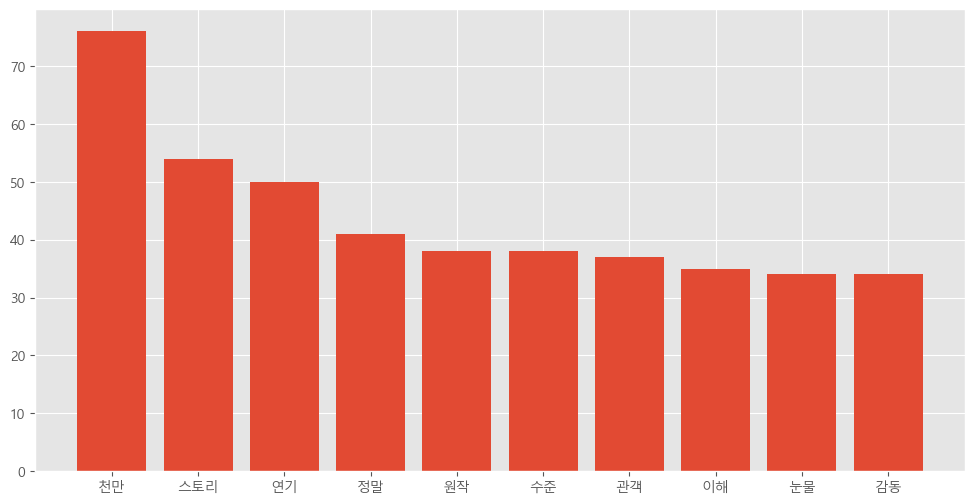

In [41]:
import collections
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 출력 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

# most_common 10개만 출력
n = neg_count_noun.most_common(10)
plt.figure(figsize=(12,6))
#w = collections.Counter(p)

# p(most_common) 값이 2차원 튜플이므로 각 값 key, value에다 저장
key = []
value = []
for i in n:
    key.append(i[0])
    value.append(i[1])

plt.bar(key,value)
plt.show()


## 전체 단어 빈도수
### 결과 해석 
- 감동이라는 단어가 160회 이상으로 많이 쓰였다는 것을 알 수 있다. 그 다음 단어들은 80회 이상 120회 미만 부근에 머무는 것을 볼 수 있다.

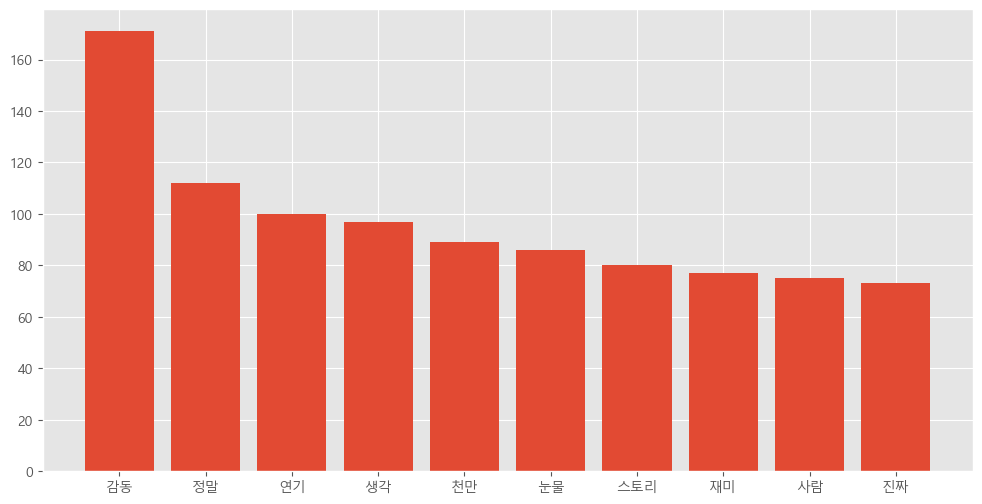

In [42]:
import collections
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 출력 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

# most_common 10개만 출력
all_wc = count_noun.most_common(10)
plt.figure(figsize=(12,6))
#w = collections.Counter(p)

# p(most_common) 값이 2차원 튜플이므로 각 값 key, value에다 저장
key = []
value = []
for i in all_wc:
    key.append(i[0])
    value.append(i[1])

plt.bar(key,value)
plt.show()


# 느낀점
---

기술 구현에 있어서 예상보다 오래걸렸다.   
 시간이 오래 걸렸던 이유는 크게 두 가지 요인 때문이었다. 첫 번째는 selenium만을 사용해 데이터 크롤링을 하려고 했다. 두 번째는 평점과 리뷰를 동시에 받아오는 것을 구현하는 것이었다.      
&ensp;

 먼저 첫 번째 요인을 좀 더 살펴보자면, selenium은 일반적인 크롬 브라우저에서 수집 불가능한 리뷰 데이터를 받아오는 데 사용할 수 있었고 '평점 더보기' 버튼을 클릭하는 데 사용했다. 큰 틀에서 리뷰 데이터를 긁어올 수 있는 환경을 만들어 준 것이지 실제로 selenium만을 사용해 원하는 리뷰를 찾는데는 이용할 수 있는 문법이 다양하지 않다는 문제가 있었다. 그래서 평점과 리뷰를 받아오는 데 beautifulSoup을 활용했다.    
 &ensp;
 
 beautifulSoup을 활용해 리뷰를 찾으려 했으나 html 태그가 ratings rating_10와 같이 리뷰마다 뒤의 숫자가 달라져 쉽게 구현하지 못했다. ratings만을 사용해 구현해보았더니 동작하였고, 그래서 평점과 리뷰가 동시에 있을 경우에만 데이터를 수집하는 것으로 코드를 작성하였다.    
 &ensp;
 
 평점을 받아오는 코드를 금방 작성하지는 못했지만, 고민을 하여 문제를 해결하려고 구글링을 하는 등 끝까지 최선을 다했다. 생각보다 해결 방법은 쉬웠지만, 끝까지 방법을 찾으려 노력했기에 기억에 남는 프로젝트였다.    
 &ensp;
 
 그리고 차근차근 생각해보면 답을 찾을 수 있다는 것을 느꼈다. 급하게 생각하다보면, 쉽게 할 수 있는 것도 돌아가게 된다. 앞으로도 다른 프로젝트를 할 때 천천히 생각해보며 답을 찾도록 할 것이다.
 
---

 데이터를 잘 수집하는 것도 중요하지만, 표현하는 것도 그만큼 중요하다는 것을 느꼈다. 사람들에게 데이터의 내용을 직관적으로 표현할 수 있는 도구가 무엇일지 잘 고민하고 선택해 사용하는 게 필요하다. 프로젝트를 수행하기 위해 데이터 시각화 방법을 살펴봤는데, 다양한 방법들이 있다는 것을 알게 됐고 개인적으로 좀 더 공부해보고 싶은 마음이 생겼다. 
 &ensp;
 
 구현을 위해 파이썬의 Counter 함수, most_common, bar에 대해 좀 더 공부하게 되었다. 파이썬이 익숙하지 않았는데, 지금은 필요한 함수를 찾고 그에 맞게 코드를 구현할 수 있을 정도로 익숙해졌다. 
&ensp;

 빈도수 그래프에 결과물을 보면, 대체적으로 영화 평을 남길 때 긍정적인 평이 더 많았다. 부정 단어를 사용하는 빈도수가 긍정 단어보다 상대적으로 더 적게 나왔다. 
 이런 결과를 활용해 단순히 코딩만 하는 게 아니라, 의미 있는 해석을 내놓을 수도 있을 것 같다. 
 